# Data Exploration

In [1]:
# pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Reading ratings file
ratings = pd.read_csv('Dataset/ratings.csv', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating','timestamp'])

# Reading users file
users = pd.read_csv('Dataset/users.csv', encoding='latin-1')

# Reading movies file
movies = pd.read_csv('Dataset/movies.csv', encoding='latin-1')


In [4]:
ratings.head()


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
# Finding the maximum user_id in the ratings
max_userid = ratings['user_id'].drop_duplicates().max()
# finding the maximum movie_id in the ratings
max_movieid = ratings['movie_id'].drop_duplicates().max()


print(f"Maximum Users: {max_userid}")
print(f"Maximum Movies:{max_movieid}")


print(ratings.info())


Maximum Users: 6040
Maximum Movies:3952
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None


In [6]:
# summary statistics of ratings
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<Axes: xlabel='rating', ylabel='Count'>

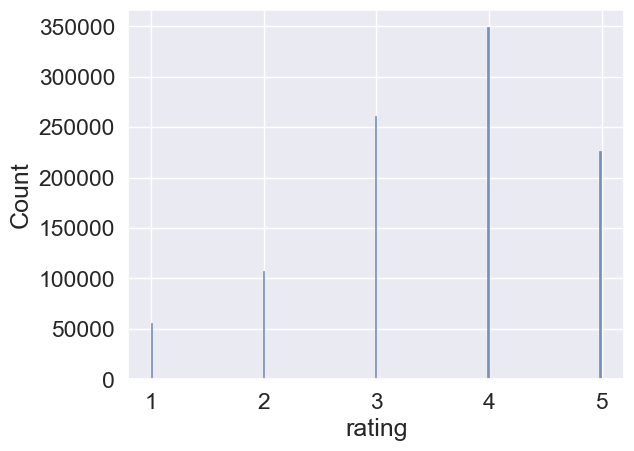

In [7]:
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.histplot(ratings['rating'].fillna(ratings['rating'].median()))
# It appears that users are quite generous in their ratings. The mean rating is 3.58 on a scale of 5. Half the movies have a rating of 4 and 5.

In [8]:
# Group by 'user_id' and count the number of ratings
user_movie_counts = ratings.groupby('user_id')['movie_id'].count()

print(user_movie_counts)
print(user_movie_counts.min())
# it means that each user rated at least 20 movies.... 

user_id
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Name: movie_id, Length: 6040, dtype: int64
20


# Movies 

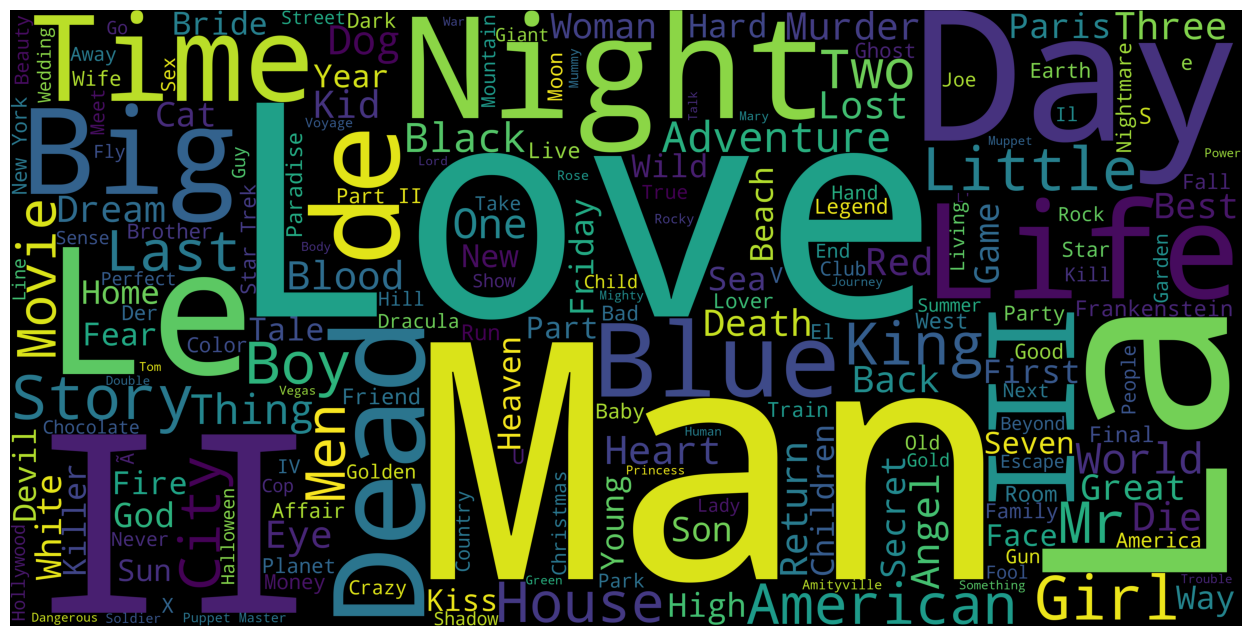

In [9]:
# Now let examine the title and most commonly occuring words in the title
# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [10]:
# From the above wordcloud. we can recognize that there are a lot of movie franchises in this dataset, as evidenced by words like II and III...
# In addition to that, Day, Love, Life, Time, Night, Man, Dead, American are among the most commonly occuring words.
# Each user rated at least 20 movies, so I doubt the distribution could be caused just by chance variance in the quality of movies.


# Now let's take a look at a subset of 20 movies with highest ranking

In [11]:


# Join all 3 files into one dataframe
merge_dataset = pd.merge(pd.merge(movies, ratings),users)
# Display 20 movies with highest ratings
merge_dataset[['title','genres','rating','user_id']].sort_values('rating', ascending=False).head(20)

,title,genres,rating,user_id
1000185,"Contender, The (2000)",Drama|Thriller,5,4802
1000182,"Contender, The (2000)",Drama|Thriller,5,4682
25,Toy Story (1995),Animation|Children's|Comedy,5,76
24,Toy Story (1995),Animation|Children's|Comedy,5,75
21,Toy Story (1995),Animation|Children's|Comedy,5,65
19,Toy Story (1995),Animation|Children's|Comedy,5,56
18,Toy Story (1995),Animation|Children's|Comedy,5,51
17,Toy Story (1995),Animation|Children's|Comedy,5,49
1000173,"Contender, The (2000)",Drama|Thriller,5,4448
1000171,"Contender, The (2000)",Drama|Thriller,5,4277


In [12]:
merge_dataset.head()

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,Under 18,K-12 student
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117,50-55,homemaker
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413,25-34,programmer
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614,25-34,technician/engineer
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370,35-44,academic/educator


In [13]:
# Now let's explore the Genres column, it is important column in recommendation system (cosine similarity) because on the basis of this feature 
# the system recommend movie 
# we can say that films in the same genre should have similar contents. so let's check exactly which genres are the most popular.

In [14]:
# splitting the genres column into individual words and making a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s)) # set is used because set has no duplicates

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0 # initializing all keyword to zero 

    for census_keywords in dataset[ref_col].str.split('|'):  # it will split the genre column on | and will iterate through it       
        if type(census_keywords) == float and pd.isnull(census_keywords):  #will check for the Nan values if exist will continue 
            continue        
        for s in [s for s in census_keywords if s in census]:  # if not nan then iterate through it and increment the count in the keyword_count
            if pd.notnull(s): 
                keyword_count[s] += 1
                
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences = count_word(movies, 'genres', genre_labels)
print(f"The top 5 genres:{keyword_occurences[:5]}")



The top 5 genres:[['Drama', 1603], ['Comedy', 1200], ['Action', 503], ['Thriller', 492], ['Romance', 471]]


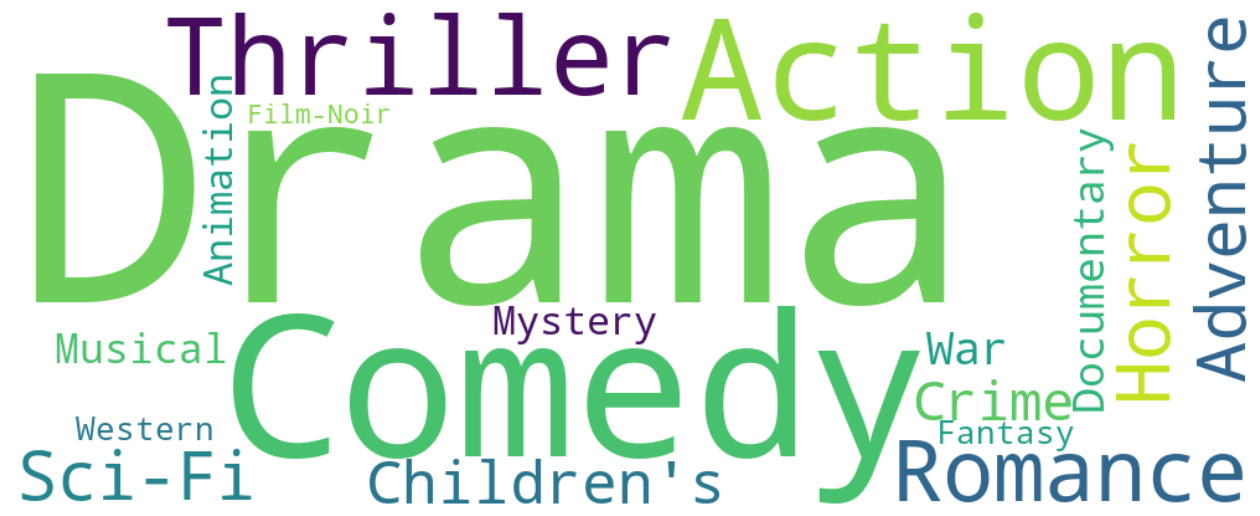

In [15]:
# now let's produce the genres wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

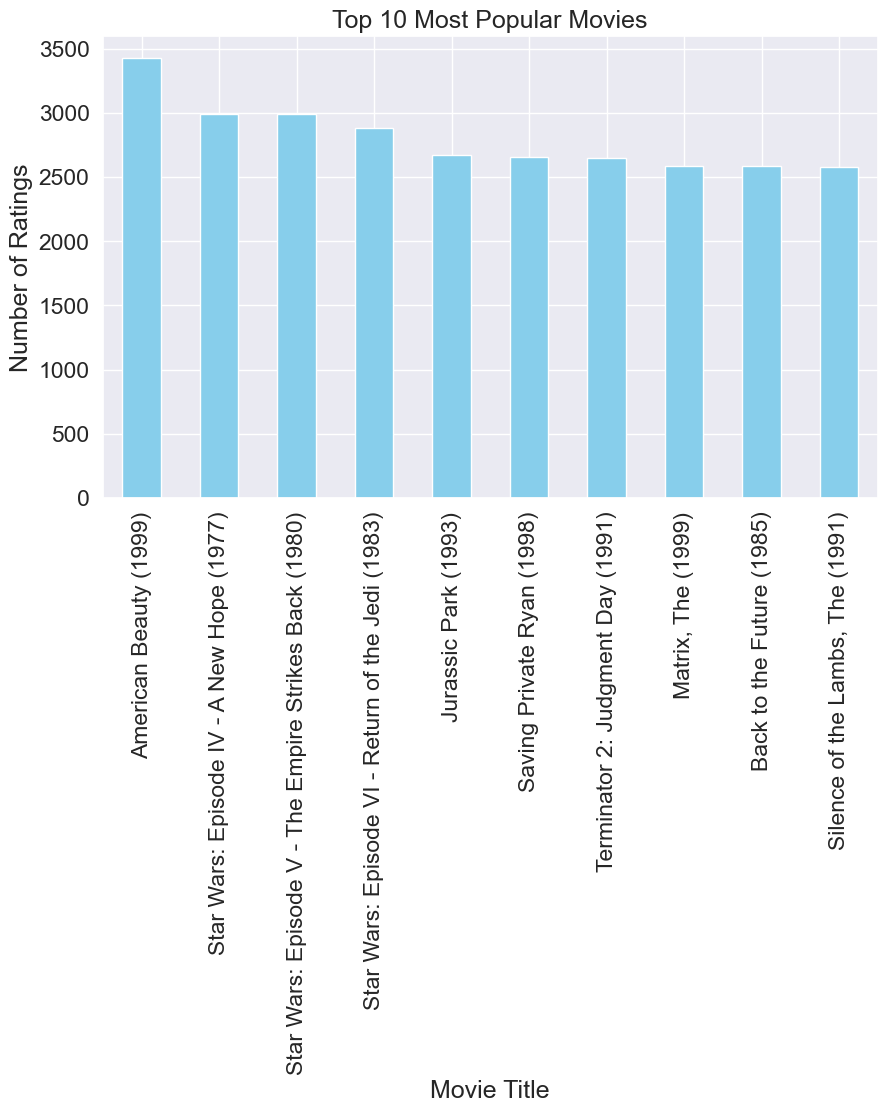

In [16]:
popular_movies = merge_dataset['title'].value_counts().head(10)
popular_movies.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Most Popular Movies")
plt.ylabel("Number of Ratings")
plt.xlabel("Movie Title")
plt.show()


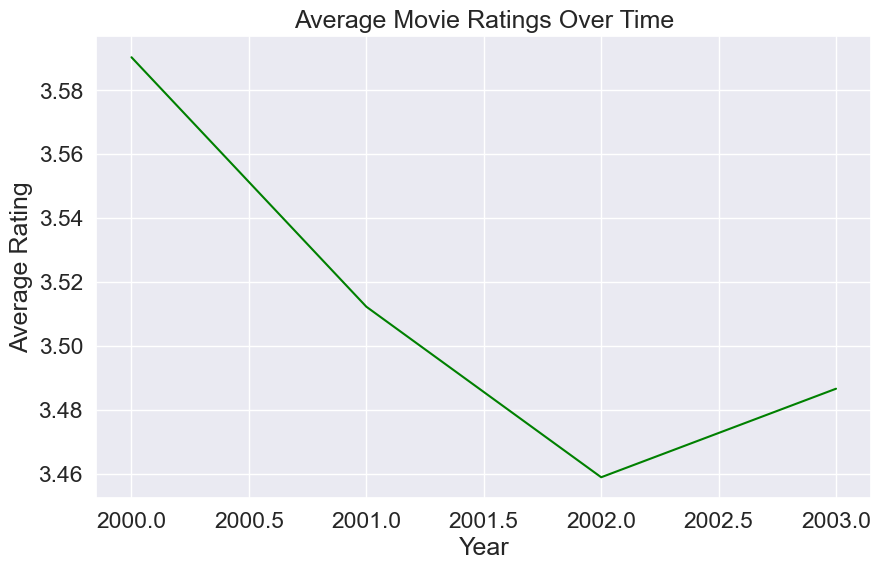

In [17]:
merge_dataset['timestamp'] = pd.to_datetime(merge_dataset['timestamp'], unit='s')
ratings_over_time = merge_dataset.groupby(merge_dataset['timestamp'].dt.year)['rating'].mean()
ratings_over_time.plot(kind='line', figsize=(10, 6), color='green')
plt.title("Average Movie Ratings Over Time")
plt.ylabel("Average Rating")
plt.xlabel("Year")
plt.show()
